# Question

수심 $h_{0} = 10m$에서 $kh=\pi$를 만족하는 파가 입사하고 있다. 입사파의 각도가 $30^{\circ}$, $45^{\circ}$, $60^{\circ}$인 경우에 대하여 파의 진행경로를 예측하시오.

## 공통

In [473]:
import math
import numpy as np

In [474]:
h0 = 10
g = 9.81

In [475]:
h = h0
kh = math.pi

k = kh / h

In [476]:
k0 = k

In [477]:
sqr_sigma = g * k * np.tanh([kh])

In [478]:
sqr_sigma

array([3.0704133])

In [479]:
sigma = math.sqrt(sqr_sigma)

In [480]:
sigma

1.7522594830545946

In [481]:
T0 = 2 * math.pi / sigma

In [482]:
T0

3.5857619079490086

In [483]:
k0

0.3141592653589793

In [484]:
L0 = 2 * math.pi / k0

In [485]:
L0

20.0

위의 주기 $T0$는 변하지 않는 값임.

## Question 1

1. 입사파의 각도가 $30^{\circ}$인 경우

In [486]:
init_angle = 30

In [487]:
def f(x, sqr_omega):
    return g * (x / sqr_omega) * np.tanh([x*h1]) - 1

In [488]:
def bisection_method(k_init, sqr_omega):
    error=0.5 * 10**(-6)

    a = -100 + k_init
    b = 100 + k_init
    
    while (b - a) / 2 > error:
        c = (b + a) / 2
        if f(c, sqr_omega) == 0:
            break
        elif f(a, sqr_omega)*f(c, sqr_omega) > 0:
            a = c
        else:
            b = c
    c = (b + a) / 2

    return c

In [489]:
angle = []
tanv = []

In [490]:
h1 = 10 - (1/10)*(0+1)
k_init = sqr_sigma / (g * math.sqrt(np.tanh([sqr_sigma / g * h1])))
k2 = abs(bisection_method(k_init, sqr_sigma))
a1 = np.arcsin(k1 / k2 * np.sin([init_angle * np.pi / 180]))
angle.append(a1)
tanv.append(np.tan([a1]))

In [491]:
angle

[array([0.52359878])]

In [492]:
k1 = k2

기본적으로 np.arcsin의 경우 Radians값을 반환함. np.sin의 경우 그 인자로 Angles이 아닌, Radians 값을 대입함.

In [493]:
for i in range(1, 99):
    h1 = 10 - (1/10)*(i+1)
    k_init = sqr_sigma / (g * math.sqrt(np.tanh(sqr_sigma / g * h1)))
    k2 = abs(bisection_method(k_init, sqr_sigma))
    a1 = np.arcsin(k1 / k2 * np.sin([init_angle * np.pi / 180]))
    angle.append(a1)
    tanv.append(np.tan(a1))

In [494]:
angle

[array([0.52359878]),
 array([0.52345419]),
 array([0.52329954]),
 array([0.52313654]),
 array([0.52296281]),
 array([0.52277873]),
 array([0.52258472]),
 array([0.5223771]),
 array([0.52215773]),
 array([0.52192436]),
 array([0.52167753]),
 array([0.5214151]),
 array([0.52113766]),
 array([0.52084316]),
 array([0.52053094]),
 array([0.52020038]),
 array([0.51985093]),
 array([0.51948075]),
 array([0.51908803]),
 array([0.51867377]),
 array([0.51823363]),
 array([0.51776873]),
 array([0.51727758]),
 array([0.51675879]),
 array([0.51620973]),
 array([0.51562921]),
 array([0.51501615]),
 array([0.51436827]),
 array([0.51368474]),
 array([0.51296354]),
 array([0.5122028]),
 array([0.51140083]),
 array([0.5105548]),
 array([0.50966207]),
 array([0.50872281]),
 array([0.50773351]),
 array([0.50669091]),
 array([0.50559457]),
 array([0.50444176]),
 array([0.50322753]),
 array([0.50195231]),
 array([0.50061182]),
 array([0.49920467]),
 array([0.49772615]),
 array([0.49617446]),
 array([0.4945

In [495]:
tanv

[array([[0.57735027]]),
 array([0.5771575]),
 array([0.57695136]),
 array([0.57673412]),
 array([0.57650262]),
 array([0.5762574]),
 array([0.57599898]),
 array([0.57572252]),
 array([0.57543047]),
 array([0.57511987]),
 array([0.57479145]),
 array([0.57444236]),
 array([0.57407343]),
 array([0.57368194]),
 array([0.57326704]),
 array([0.57282793]),
 array([0.57236391]),
 array([0.57187255]),
 array([0.57135153]),
 array([0.57080216]),
 array([0.57021876]),
 array([0.56960286]),
 array([0.56895254]),
 array([0.56826602]),
 array([0.56753988]),
 array([0.56677262]),
 array([0.56596292]),
 array([0.56510783]),
 array([0.56420636]),
 array([0.56325596]),
 array([0.56225431]),
 array([0.56119929]),
 array([0.56008733]),
 array([0.55891514]),
 array([0.55768312]),
 array([0.55638684]),
 array([0.55502228]),
 array([0.55358908]),
 array([0.55208395]),
 array([0.55050068]),
 array([0.54884017]),
 array([0.54709717]),
 array([0.54527024]),
 array([0.54335367]),
 array([0.54134556]),
 array([0.

In [496]:
X = [round(10 - (1/10) * (i+1), 1) for i in range(0, 99)]

In [497]:
X

[9.9,
 9.8,
 9.7,
 9.6,
 9.5,
 9.4,
 9.3,
 9.2,
 9.1,
 9.0,
 8.9,
 8.8,
 8.7,
 8.6,
 8.5,
 8.4,
 8.3,
 8.2,
 8.1,
 8.0,
 7.9,
 7.8,
 7.7,
 7.6,
 7.5,
 7.4,
 7.3,
 7.2,
 7.1,
 7.0,
 6.9,
 6.8,
 6.7,
 6.6,
 6.5,
 6.4,
 6.3,
 6.2,
 6.1,
 6.0,
 5.9,
 5.8,
 5.7,
 5.6,
 5.5,
 5.4,
 5.3,
 5.2,
 5.1,
 5.0,
 4.9,
 4.8,
 4.7,
 4.6,
 4.5,
 4.4,
 4.3,
 4.2,
 4.1,
 4.0,
 3.9,
 3.8,
 3.7,
 3.6,
 3.5,
 3.4,
 3.3,
 3.2,
 3.1,
 3.0,
 2.9,
 2.8,
 2.7,
 2.6,
 2.5,
 2.4,
 2.3,
 2.2,
 2.1,
 2.0,
 1.9,
 1.8,
 1.7,
 1.6,
 1.5,
 1.4,
 1.3,
 1.2,
 1.1,
 1.0,
 0.9,
 0.8,
 0.7,
 0.6,
 0.5,
 0.4,
 0.3,
 0.2,
 0.1]

In [498]:
len(X)

99

In [499]:
DeltaX = round(abs(X[0] - X[1]), 1)

In [500]:
DeltaX

0.1

In [501]:
Y = []

In [502]:
for i in range(0, len(X)):
    Y.append(tanv[i] * DeltaX)

In [503]:
Y

[array([[0.05773503]]),
 array([0.05771575]),
 array([0.05769514]),
 array([0.05767341]),
 array([0.05765026]),
 array([0.05762574]),
 array([0.0575999]),
 array([0.05757225]),
 array([0.05754305]),
 array([0.05751199]),
 array([0.05747914]),
 array([0.05744424]),
 array([0.05740734]),
 array([0.05736819]),
 array([0.0573267]),
 array([0.05728279]),
 array([0.05723639]),
 array([0.05718726]),
 array([0.05713515]),
 array([0.05708022]),
 array([0.05702188]),
 array([0.05696029]),
 array([0.05689525]),
 array([0.0568266]),
 array([0.05675399]),
 array([0.05667726]),
 array([0.05659629]),
 array([0.05651078]),
 array([0.05642064]),
 array([0.0563256]),
 array([0.05622543]),
 array([0.05611993]),
 array([0.05600873]),
 array([0.05589151]),
 array([0.05576831]),
 array([0.05563868]),
 array([0.05550223]),
 array([0.05535891]),
 array([0.05520839]),
 array([0.05505007]),
 array([0.05488402]),
 array([0.05470972]),
 array([0.05452702]),
 array([0.05433537]),
 array([0.05413456]),
 array([0.05

In [504]:
len(X)

99

In [505]:
len(Y)

99

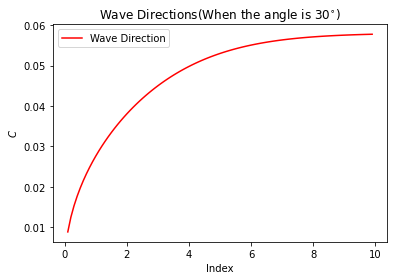

In [506]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(X, Y, color='r', label='Wave Direction')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Index")
plt.ylabel("$C$")
plt.title("Wave Directions(When the angle is $30^{\circ}$)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

## Question 2

1. 입사파의 각도가 $45^{\circ}$인 경우

In [507]:
init_angle = 45

In [508]:
def f(x, sqr_omega):
    return g * (x / sqr_omega) * np.tanh([x * h1]) - 1

In [509]:
def bisection_method(k_init, sqr_omega):
    error=0.5 * 10**(-6)

    a = -100 + k_init
    b = 100 + k_init
    
    while (b - a) / 2 > error:
        c = (b + a) / 2
        if f(c, sqr_omega) == 0:
            break
        elif f(a, sqr_omega)*f(c, sqr_omega) > 0:
            a = c
        else:
            b = c
    c = (b + a) / 2

    return c

In [510]:
angle = []
tanv = []

In [511]:
h1 = 10 - (1/10)*(0+1)
k_init = sqr_sigma / (g * math.sqrt(np.tanh([sqr_sigma / g * h1])))
k2 = abs(bisection_method(k_init, sqr_sigma))
a1 = np.arcsin(k1 / k2 * np.sin([init_angle * np.pi / 180]))
angle.append(a1)
tanv.append(np.tan([a1]))

In [512]:
angle

[array([[0.78539816]])]

In [513]:
k1 = k2

기본적으로 np.arcsin의 경우 Radians값을 반환함. np.sin의 경우 그 인자로 Angles이 아닌, Radians 값을 대입함.

In [514]:
for i in range(1, 99):
    h1 = 10 - (1/10)*(i+1)
    k_init = sqr_sigma / (g * math.sqrt(np.tanh(sqr_sigma / g * h1)))
    k2 = abs(bisection_method(k_init, sqr_sigma))
    a1 = np.arcsin(k1 / k2 * np.sin([init_angle * np.pi / 180]))
    angle.append(a1)
    tanv.append(np.tan(a1))

In [515]:
angle

[array([[0.78539816]]),
 array([0.78514775]),
 array([0.78487996]),
 array([0.78459776]),
 array([0.78429704]),
 array([0.78397848]),
 array([0.78364279]),
 array([0.78328366]),
 array([0.78290426]),
 array([0.78250078]),
 array([0.78207415]),
 array([0.78162066]),
 array([0.78114141]),
 array([0.78063284]),
 array([0.78009385]),
 array([0.77952343]),
 array([0.77892063]),
 array([0.77828232]),
 array([0.77760547]),
 array([0.77689179]),
 array([0.77613389]),
 array([0.77533376]),
 array([0.77448891]),
 array([0.77359701]),
 array([0.77265364]),
 array([0.77165683]),
 array([0.77060485]),
 array([0.76949389]),
 array([0.76832264]),
 array([0.76708779]),
 array([0.7657863]),
 array([0.76441542]),
 array([0.76297051]),
 array([0.76144727]),
 array([0.7598462]),
 array([0.75816155]),
 array([0.75638803]),
 array([0.75452521]),
 array([0.75256872]),
 array([0.75051052]),
 array([0.74835171]),
 array([0.74608543]),
 array([0.74370976]),
 array([0.74121722]),
 array([0.7386053]),
 array([0.7

In [516]:
tanv

[array([[[1.]]]),
 array([0.99949929]),
 array([0.99896413]),
 array([0.99840047]),
 array([0.99780017]),
 array([0.99716465]),
 array([0.99649539]),
 array([0.9957799]),
 array([0.9950246]),
 array([0.99422196]),
 array([0.99337397]),
 array([0.9924734]),
 array([0.99152253]),
 array([0.99051448]),
 array([0.98944726]),
 array([0.98831902]),
 array([0.98712814]),
 array([0.98586864]),
 array([0.98453481]),
 array([0.98313035]),
 array([0.98164102]),
 array([0.9800711]),
 array([0.9784161]),
 array([0.97667191]),
 array([0.97483036]),
 array([0.97288818]),
 array([0.97084258]),
 array([0.96868682]),
 array([0.9664191]),
 array([0.96403379]),
 array([0.96152589]),
 array([0.95889107]),
 array([0.95612143]),
 array([0.95320994]),
 array([0.95015877]),
 array([0.94695832]),
 array([0.94360009]),
 array([0.94008481]),
 array([0.93640602]),
 array([0.93255051]),
 array([0.92852237]),
 array([0.92431107]),
 array([0.9199154]),
 array([0.91532408]),
 array([0.91053527]),
 array([0.90554129]),

In [517]:
X = [round(10 - (1 / 10) * (i + 1), 1) for i in range(0, 99)]

In [518]:
X

[9.9,
 9.8,
 9.7,
 9.6,
 9.5,
 9.4,
 9.3,
 9.2,
 9.1,
 9.0,
 8.9,
 8.8,
 8.7,
 8.6,
 8.5,
 8.4,
 8.3,
 8.2,
 8.1,
 8.0,
 7.9,
 7.8,
 7.7,
 7.6,
 7.5,
 7.4,
 7.3,
 7.2,
 7.1,
 7.0,
 6.9,
 6.8,
 6.7,
 6.6,
 6.5,
 6.4,
 6.3,
 6.2,
 6.1,
 6.0,
 5.9,
 5.8,
 5.7,
 5.6,
 5.5,
 5.4,
 5.3,
 5.2,
 5.1,
 5.0,
 4.9,
 4.8,
 4.7,
 4.6,
 4.5,
 4.4,
 4.3,
 4.2,
 4.1,
 4.0,
 3.9,
 3.8,
 3.7,
 3.6,
 3.5,
 3.4,
 3.3,
 3.2,
 3.1,
 3.0,
 2.9,
 2.8,
 2.7,
 2.6,
 2.5,
 2.4,
 2.3,
 2.2,
 2.1,
 2.0,
 1.9,
 1.8,
 1.7,
 1.6,
 1.5,
 1.4,
 1.3,
 1.2,
 1.1,
 1.0,
 0.9,
 0.8,
 0.7,
 0.6,
 0.5,
 0.4,
 0.3,
 0.2,
 0.1]

In [519]:
len(X)

99

In [520]:
DeltaX = round(abs(X[0] - X[1]), 1)

In [521]:
DeltaX

0.1

In [522]:
Y = []

In [523]:
for i in range(0, len(X)):
    Y.append(tanv[i] * DeltaX)

In [524]:
Y

[array([[[0.1]]]),
 array([0.09994993]),
 array([0.09989641]),
 array([0.09984005]),
 array([0.09978002]),
 array([0.09971647]),
 array([0.09964954]),
 array([0.09957799]),
 array([0.09950246]),
 array([0.0994222]),
 array([0.0993374]),
 array([0.09924734]),
 array([0.09915225]),
 array([0.09905145]),
 array([0.09894473]),
 array([0.0988319]),
 array([0.09871281]),
 array([0.09858686]),
 array([0.09845348]),
 array([0.09831303]),
 array([0.0981641]),
 array([0.09800711]),
 array([0.09784161]),
 array([0.09766719]),
 array([0.09748304]),
 array([0.09728882]),
 array([0.09708426]),
 array([0.09686868]),
 array([0.09664191]),
 array([0.09640338]),
 array([0.09615259]),
 array([0.09588911]),
 array([0.09561214]),
 array([0.09532099]),
 array([0.09501588]),
 array([0.09469583]),
 array([0.09436001]),
 array([0.09400848]),
 array([0.0936406]),
 array([0.09325505]),
 array([0.09285224]),
 array([0.09243111]),
 array([0.09199154]),
 array([0.09153241]),
 array([0.09105353]),
 array([0.09055413

In [525]:
len(X)

99

In [526]:
len(Y)

99

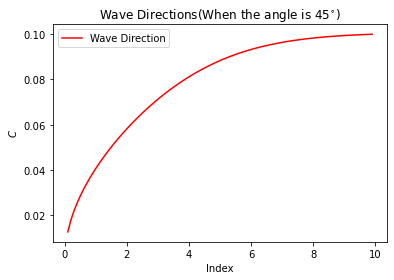

In [527]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(X, Y, color='r', label='Wave Direction')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Index")
plt.ylabel("$C$")
plt.title("Wave Directions(When the angle is $45^{\circ}$)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

## Question 3

1. 입사파의 각도가 $60^{\circ}$인 경우

In [528]:
init_angle = 60

In [529]:
def f(x, sqr_omega):
    return g * (x / sqr_omega) * np.tanh([x * h1]) - 1

In [530]:
def bisection_method(k_init, sqr_omega):
    error=0.5 * 10**(-6)

    a = -100 + k_init
    b = 100 + k_init
    
    while (b - a) / 2 > error:
        c = (b + a) / 2
        if f(c, sqr_omega) == 0:
            break
        elif f(a, sqr_omega) * f(c, sqr_omega) > 0:
            a = c
        else:
            b = c
    c = (b + a) / 2

    return c

In [531]:
angle = []
tanv = []

In [532]:
h1 = 10 - (1/10)*(0+1)
k_init = sqr_sigma / (g * math.sqrt(np.tanh([sqr_sigma / g * h1])))
k2 = abs(bisection_method(k_init, sqr_sigma))
a1 = np.arcsin(k1 / k2 * np.sin([init_angle * np.pi / 180]))
angle.append(a1)
tanv.append(np.tan([a1]))

In [533]:
angle

[array([[1.04719755]])]

In [534]:
k1 = k2

기본적으로 np.arcsin의 경우 Radians값을 반환함. np.sin의 경우 그 인자로 Angles이 아닌, Radians 값을 대입함.

In [535]:
for i in range(1, 99):
    h1 = 10 - (1/10)*(i+1)
    k_init = sqr_sigma / (g * math.sqrt(np.tanh(sqr_sigma / g * h1)))
    k2 = abs(bisection_method(k_init, sqr_sigma))
    a1 = np.arcsin(k1 / k2 * np.sin([init_angle * np.pi / 180]))
    angle.append(a1)
    tanv.append(np.tan(a1))

In [536]:
angle

[array([[1.04719755]]),
 array([1.04676392]),
 array([1.04630046]),
 array([1.04581232]),
 array([1.04529244]),
 array([1.04474206]),
 array([1.04416246]),
 array([1.04354281]),
 array([1.04288868]),
 array([1.04219354]),
 array([1.04145911]),
 array([1.04067914]),
 array([1.03985558]),
 array([1.03898249]),
 array([1.03805811]),
 array([1.03708084]),
 array([1.03604928]),
 array([1.03495823]),
 array([1.03380273]),
 array([1.03258597]),
 array([1.03129558]),
 array([1.02993527]),
 array([1.02850111]),
 array([1.02698949]),
 array([1.02539331]),
 array([1.02370968]),
 array([1.02193613]),
 array([1.02006674]),
 array([1.01809989]),
 array([1.0160306]),
 array([1.01385445]),
 array([1.01156753]),
 array([1.00916288]),
 array([1.00663422]),
 array([1.00398325]),
 array([1.00120143]),
 array([0.99828112]),
 array([0.99522268]),
 array([0.9920202]),
 array([0.98866178]),
 array([0.98515062]),
 array([0.98147705]),
 array([0.97763951]),
 array([0.97362758]),
 array([0.96943898]),
 array([0.

In [537]:
tanv

[array([[[1.73205081]]]),
 array([1.7303176]),
 array([1.728468]),
 array([1.72652312]),
 array([1.72445542]),
 array([1.72227041]),
 array([1.71997388]),
 array([1.71752372]),
 array([1.71494288]),
 array([1.7122066]),
 array([1.70932271]),
 array([1.70626789]),
 array([1.70305119]),
 array([1.69965084]),
 array([1.69606173]),
 array([1.69227952]),
 array([1.68830071]),
 array([1.6841075]),
 array([1.67968335]),
 array([1.67504317]),
 array([1.67014286]),
 array([1.66499979]),
 array([1.65960269]),
 array([1.65394186]),
 array([1.64799496]),
 array([1.64175611]),
 array([1.6352212]),
 array([1.62837411]),
 array([1.62121487]),
 array([1.61373189]),
 array([1.60591616]),
 array([1.59776131]),
 array([1.58925066]),
 array([1.58037096]),
 array([1.57113767]),
 array([1.56153097]),
 array([1.55153538]),
 array([1.54116367]),
 array([1.53040773]),
 array([1.51924077]),
 array([1.5076871]),
 array([1.49572923]),
 array([1.48337718]),
 array([1.47061325]),
 array([1.45744698]),
 array([1.443

In [538]:
X = [round(10 - (1 / 10) * (i + 1), 1) for i in range(0, 99)]

In [539]:
X

[9.9,
 9.8,
 9.7,
 9.6,
 9.5,
 9.4,
 9.3,
 9.2,
 9.1,
 9.0,
 8.9,
 8.8,
 8.7,
 8.6,
 8.5,
 8.4,
 8.3,
 8.2,
 8.1,
 8.0,
 7.9,
 7.8,
 7.7,
 7.6,
 7.5,
 7.4,
 7.3,
 7.2,
 7.1,
 7.0,
 6.9,
 6.8,
 6.7,
 6.6,
 6.5,
 6.4,
 6.3,
 6.2,
 6.1,
 6.0,
 5.9,
 5.8,
 5.7,
 5.6,
 5.5,
 5.4,
 5.3,
 5.2,
 5.1,
 5.0,
 4.9,
 4.8,
 4.7,
 4.6,
 4.5,
 4.4,
 4.3,
 4.2,
 4.1,
 4.0,
 3.9,
 3.8,
 3.7,
 3.6,
 3.5,
 3.4,
 3.3,
 3.2,
 3.1,
 3.0,
 2.9,
 2.8,
 2.7,
 2.6,
 2.5,
 2.4,
 2.3,
 2.2,
 2.1,
 2.0,
 1.9,
 1.8,
 1.7,
 1.6,
 1.5,
 1.4,
 1.3,
 1.2,
 1.1,
 1.0,
 0.9,
 0.8,
 0.7,
 0.6,
 0.5,
 0.4,
 0.3,
 0.2,
 0.1]

In [540]:
len(X)

99

In [541]:
DeltaX = round(abs(X[0] - X[1]), 1)

In [542]:
DeltaX

0.1

In [543]:
Y = []

In [544]:
for i in range(0, len(X)):
    Y.append(tanv[i] * DeltaX)

In [545]:
Y

[array([[[0.17320508]]]),
 array([0.17303176]),
 array([0.1728468]),
 array([0.17265231]),
 array([0.17244554]),
 array([0.17222704]),
 array([0.17199739]),
 array([0.17175237]),
 array([0.17149429]),
 array([0.17122066]),
 array([0.17093227]),
 array([0.17062679]),
 array([0.17030512]),
 array([0.16996508]),
 array([0.16960617]),
 array([0.16922795]),
 array([0.16883007]),
 array([0.16841075]),
 array([0.16796834]),
 array([0.16750432]),
 array([0.16701429]),
 array([0.16649998]),
 array([0.16596027]),
 array([0.16539419]),
 array([0.1647995]),
 array([0.16417561]),
 array([0.16352212]),
 array([0.16283741]),
 array([0.16212149]),
 array([0.16137319]),
 array([0.16059162]),
 array([0.15977613]),
 array([0.15892507]),
 array([0.1580371]),
 array([0.15711377]),
 array([0.1561531]),
 array([0.15515354]),
 array([0.15411637]),
 array([0.15304077]),
 array([0.15192408]),
 array([0.15076871]),
 array([0.14957292]),
 array([0.14833772]),
 array([0.14706132]),
 array([0.1457447]),
 array([0.1

In [546]:
len(X)

99

In [547]:
len(Y)

99

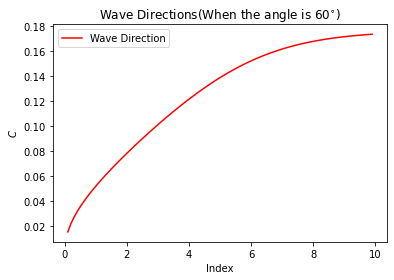

In [548]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(X, Y, color='r', label='Wave Direction')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Index")
plt.ylabel("$C$")
plt.title("Wave Directions(When the angle is $60^{\circ}$)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()